In [ ]:
import pandas as pd
import numpy as np
import json
import re
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline

import xgboost as xgb

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, Normalizer


np.random.seed(33)
try:
    import seaborn as sns
except ImportError:
    from pip._internal import main as pip
    pip(['install', '--user', 'seaborn'])
    import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

Toying with the famous California housing Dataset

In [ ]:

np.random.seed(33)

In [ ]:
data = r'/content/drive/MyDrive/Colab Notebooks/datafiles/house-prices-advanced-regression-techniques/train.csv'
test_data = r'/content/drive/MyDrive/Colab Notebooks/datafiles/house-prices-advanced-regression-techniques/test.csv'
saving_folder = r'/content/drive/MyDrive/Colab Notebooks/predictions'

In [ ]:
df = pd.read_csv(data)
test_df = pd.read_csv(test_data)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [ ]:
features = df.columns
features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [ ]:
numeric = []
for feature in list(features):
  try:
    int(df.iloc[0][feature])
    numeric.append(feature)
  except ValueError:
    pass

numeric 

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
qualitative_ft = [feature for feature in features if feature not in numeric]

**Removing outliers!**

In [ ]:
df["MeterCost"] = df.apply(lambda row: round(row.SalePrice / row.LotArea, 2), axis=1)

In [ ]:
mean_cost = df.MeterCost.mean()
std_cost = df.MeterCost.std()

In [ ]:
def get_zscore(row):
  mean = mean_cost
  std = std_cost
  return (row.MeterCost - mean )  / std

df["z_score"] = df.apply( get_zscore, axis =1)

dff =  df[(df.z_score >= - 3 ) & (df.z_score <= 3 ) ]
dff.reset_index(inplace=True) 

dff.shape

(1418, 84)

In [ ]:
df.shape

(1460, 83)

To drop: Fence, Alley, PoolQC

filling strategies for training data:

median = LotFrontage, MasVnrArea

constant = MiscFeature 

most_common = FireplaceQu, GarageQual, GarageCond, GarageYrBlt, GarageFinish BsmtQual, BsmtCond, BsmExposure, BsmtFinType1, BsmtFinType2, Electrical, MasVnrType

In [ ]:
def df_fill_missing_values(dataframe: pd.DataFrame, strategy_columns: dict, fill_value='unknown'):
  """Fills missing values in dataframes columns using Sklearn imputer. 
  Params = DataFrame, and dict of imputer_strategy(str) and column_names iterable pairs
  strategoies: mean, median, most_frequent or constant (uses fill value)"""
  from sklearn.impute import SimpleImputer
  df = dataframe
  for imputer_strategy, column_names in strategy_columns.items():
    for column_name in column_names:
      imputer = SimpleImputer(strategy=imputer_strategy, fill_value=fill_value)
      incomplete = np.array(df[column_name]).reshape(-1, 1)
      filled = imputer.fit(incomplete).transform(incomplete)
      filled = pd.DataFrame(filled, columns=[column_name])
      df = df.drop(column_name, axis=1).join(filled)
  return df


In [ ]:
def standardize_features( dataframe: pd.DataFrame, feature_names: list, operation="standardize"):
  """standardizes numerical features and returns a dataframe"""
  from sklearn.preprocessing import StandardScaler, Normalizer
  if operation == "normalize":
    operator = Normalizer()
  else:
    operator = StandardScaler()
  df = dataframe
  for column_name in feature_names:
      raw_data = np.array(df[column_name]).reshape(-1, 1)
      transformed = operator.fit_transform(raw_data)
      ready = pd.DataFrame(transformed, columns=[column_name])
      df = df.drop(column_name, axis=1).join(ready)
  return df

In [ ]:
gone = ['Alley', 'PoolQC', 'Fence', 'Id']

class Preprocess:
  
  strategy1 = {"most_frequent": ["FireplaceQu", "GarageQual", "GarageCond", "GarageYrBlt","GarageType", "GarageFinish", "BsmtQual","BsmtExposure","BsmtCond", "BsmtFinType1", "BsmtFinType2", "Electrical", "MasVnrType"]
              ,"median": ["LotFrontage", "MasVnrArea"],
              "constant": ["MiscFeature"]
              }

  test_has_nan = [feat for feat in list(test_df.columns) if test_df[feat].isnull().values.any()]
  strategy2 = {"most_frequent": [ft for ft in test_has_nan if ft in qualitative_ft and ft not in ["MiscFeature","LotFrontage", "MasVnrArea","Alley", "Fence", "PoolQC", "Id" ]],
               "median": [ft for ft in test_has_nan if ft in numeric and ft not in "Id"],
               "constant": ["MiscFeature"]
  }
  def fit_transform(self, dataframe, test_data=False):
    to_delete = gone
    if test_data:
      strategy = self.strategy2
    else:
      to_delete = gone + ["MeterCost", "z_score"]
      strategy = self.strategy1
    df = dataframe.drop(to_delete, axis=1)
    filled = df_fill_missing_values(df, strategy)
    return filled


In [ ]:
preprocess = Preprocess()
filled = preprocess.fit_transform(dff).drop("SalePrice", axis=1)   # df for data not filtered for outliers
filled_test = preprocess.fit_transform(test_df, test_data=True)

Correlated features🤔

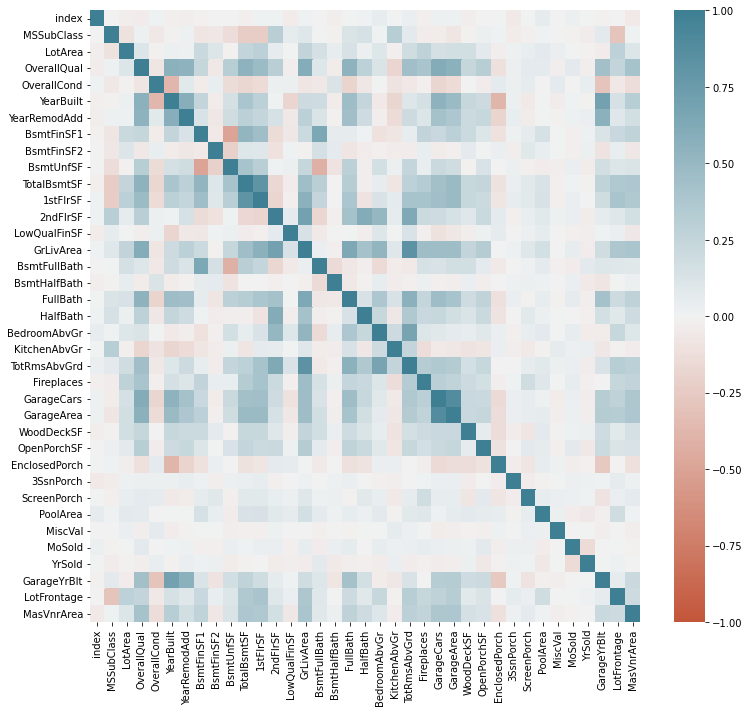

In [ ]:
fig, ax = plt.subplots(figsize=(11, 10))
ax = sns.heatmap(filled.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
for ft in gone:
  try:
    qualitative_ft.remove(ft)
  except ValueError:
    pass

temp_joined = pd.concat([filled, filled_test], ignore_index=True, axis=0)

try:
  temp_joined = temp_joined.drop(["index"], axis=1)
except KeyError:
  pass


encoded = pd.get_dummies(temp_joined, prefix='', prefix_sep='', columns=qualitative_ft, drop_first=True)

x = encoded.iloc[0:1418]                           # ADJUST WHEN OUTLIERS ARE REMOVED!  WITH OUTLIERS = 1460
y = dff.SalePrice                                   # ADJUST WHEN OUTLIERS ARE REMOVED! WITH OUTLIERS = dff

testing_data = encoded.iloc[1418:]                  # ADJUST WHEN OUTLIERS ARE REMOVED!  WITH OUTLIERS = 1460

In [ ]:
x_train_full, x_test, y_train_full, y_test =  train_test_split(x, y, test_size=0.1)                  
x_valid, x_train =  x_train_full[:135], x_train_full[135:]
y_valid, y_train =  y_train_full[:135], y_train_full[135:]

SKlearn Models

In [ ]:
x_train.iloc[0:2]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt,LotFrontage,MasVnrArea,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Gd,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y,Othr,Shed,TenC,unknown,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
90,20,8500,5,3,1961,1961,600.0,0.0,635.0,1235.0,1235,0,0,1235,0.0,0.0,1,0,2,1,6,0,2.0,480.0,0,0,0,0,0,0,0,12,2006,1961.0,85.0,203.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
886,20,8885,5,5,1983,1983,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,2.0,484.0,164,0,0,0,0,0,0,6,2006,1983.0,70.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
forests = RandomForestRegressor(random_state=42, n_estimators=200)
xgbreg = xgb.XGBRegressor(n_estimators = 300, objective='reg:squarederror', learning_rate=0.1, random_state=42, max_depth=7 )  # best with full data = learning_rate=0.12, random_state=42, max_depth=5

selected_model = xgbreg
xgb_train = x_train.to_numpy()
xgb_test = x_test.to_numpy()


selected_model.fit(xgb_train, y_train)
pred = selected_model.predict(xgb_test)
squared_error = mean_squared_error(pred, y_test, squared=False)
absolute_error = mean_absolute_error(pred, y_test)
print(absolute_error, squared_error)

17182.389524647886 27019.616366100945


In [ ]:
x_train.shape

(1141, 240)

Neural network

In [ ]:

tf.random.set_seed(42)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True, monitor="loss")



sample_to_normalize = x_train
norm_layer = keras.layers.Normalization(axis=1)
norm_layer.adapt(tf.constant(sample_to_normalize))

neural = keras.models.Sequential([
norm_layer,
keras.layers.Dense(240, activation="selu", kernel_initializer="lecun_normal", input_shape=x_train.shape[1:]),
keras.layers.Dropout(rate=0.6),
keras.layers.Dense(240, kernel_initializer="lecun_normal", activation="selu"),
keras.layers.Dense(1, activation=None),
])

optimizer = keras.optimizers.SGD(learning_rate=0.0005, nesterov=True) #keras.optimizers.RMSprop(lr=0.001) 
#optimizer = keras.optimizers.Nadam(learning_rate=0.0005)
loss = tf.keras.losses.MeanAbsoluteError()
neural.compile(loss=loss, optimizer= optimizer)

history = neural.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=1000, callbacks=[early_stopping_cb])

Epoch 1/1000
36/36 [==============================] - 2s 32ms/step - loss: 183746.2344 - val_loss: 164925.0000
Epoch 2/1000
36/36 [==============================] - 0s 9ms/step - loss: 183745.9219 - val_loss: 165164.2656
Epoch 3/1000
36/36 [==============================] - 0s 9ms/step - loss: 183745.8438 - val_loss: 166610.9688
Epoch 4/1000
36/36 [==============================] - 0s 9ms/step - loss: 183745.6875 - val_loss: 168055.5312
Epoch 5/1000
36/36 [==============================] - 0s 8ms/step - loss: 183745.5156 - val_loss: 169500.9219
Epoch 6/1000
36/36 [==============================] - 0s 13ms/step - loss: 183745.4062 - val_loss: 170902.5156
Epoch 7/1000
36/36 [==============================] - 0s 6ms/step - loss: 183745.1406 - val_loss: 172229.9219
Epoch 8/1000
36/36 [==============================] - 0s 9ms/step - loss: 183744.9688 - val_loss: 173679.1250
Epoch 9/1000
36/36 [==============================] - 0s 13ms/step - loss: 183744.7969 - val_loss: 175019.0000
Epoch 1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-79b12a4775a4>", line 25, in <module>
    history = neural.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=1000, callbacks=[early_stopping_cb])
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1431, in fit
    _use_cached_eval_dataset=True)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1716, in evaluate
    tmp_logs = self.test_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/tracebac

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def kaggle_submission(trained_model, test_data, savename="my_predictions", neural=False):
  predictions = model.predict(test_data)
  if neural:
    predictions = [pred for [pred] in predictions]
  indices = range(1461, 2920)
  sub_df = pd.DataFrame(zip(indices, predictions) , columns=["Id", "SalePrice"])
  with open(f"{saving_folder}/{savename}.csv", 'w', encoding = 'utf-8-sig') as f:
    sub_df.to_csv(f, index=False)


Making predictions

In [ ]:
#kaggle_submission(xgbreg, testing_data.to_numpy(), "xgbreg", neural=False)

Trying dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd


def find_n_components(X_train, variance_perc):
    pca = PCA()
    pca.fit(X_train)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    return np.argmax(cumsum >= variance_perc) + 1


def drop_dimensions(x_train, preserved_variance):
    """retain n% of variance , while ignoring the rest of the data"""
    pca = PCA(n_components=preserved_variance,)
    return pca.fit_transform(x_train)


def pca_frame(x_train, components=10):
    pca = PCA(n_components=components)
    pca.fit_transform(x_train)
    indexes = [f"PCA-{n}" for n in range(1, components + 1)]
    return pd.DataFrame(pca.components_, columns=x_train.columns, index=indexes)


In [ ]:
find_n_components(x_train, 0.9999)

In [ ]:
reduced = drop_dimensions(x_train,0.9999)

In [ ]:
reduced

In [ ]:
pca_results = pca_frame(x_train, components=20)
pca_results

In [ ]:
best_features = list(pca_results.idxmax(axis=1))
best_features

In [ ]:
reduced_train = x_train.drop([feat for feat in list(x_train.columns) if feat not in best_features], axis=1)
reduced_x_test = x_test.drop([feat for feat in list(x_train.columns) if feat not in best_features], axis=1)
reduced_x_valid = x_valid.drop([feat for feat in list(x_train.columns) if feat not in best_features], axis=1)
reduced_test = testing_data.drop([feat for feat in list(x_train.columns) if feat not in best_features], axis=1)

In [ ]:
reduced_train

In [ ]:
np.arange(0, 100, 10)

In [ ]:
df.index